In [4]:
#load the csv data to the dataframe
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import sys

#load the csv data to the dataframe
def load_data(file_path):
    if not os.path.exists(file_path):
        print("The file does not exist.")
        sys.exit()
    df = pd.read_csv(file_path)
    return df

# call the load_data function
file_path = 'individual_stocks_5yr/individual_stocks_5yr/ACN_data.csv'
df = load_data(file_path)

# display sample data
print(df.head())

         date   open    high    low  close   volume Name
0  2013-02-08  73.01  73.710  72.82  73.31  2000477  ACN
1  2013-02-11  73.09  73.270  72.10  73.07  1880055  ACN
2  2013-02-12  72.89  73.495  72.58  73.37  1710274  ACN
3  2013-02-13  73.32  73.710  73.20  73.56  1884631  ACN
4  2013-02-14  73.21  73.500  72.66  73.13  2096346  ACN


In [5]:
# engineer a new feature to include EMAs
def add_EMA(df, period=14):
    df['EMA'+str(period)] = df['close'].ewm(span=period, adjust=False).mean()
    return df

# call the add_EMA function
df = add_EMA(df,14)
df = add_EMA(df,20)
df = add_EMA(df,50)
df = add_EMA(df,100)
df = add_EMA(df,200)

# engineer new features for each EMA cross
def add_cross(df):
    df['cross'] = 0
    df['cross_14'] = 0
    df['cross_20'] = 0
    df['cross_50'] = 0
    df['cross_100'] = 0
    df['cross_200'] = 0
    
    for i in range(1, len(df)):
        if df['close'][i] > df['EMA14'][i] and df['close'][i-1] < df['EMA14'][i-1]:
            df['cross'][i] = 1
            df['cross_14'][i] = 1
        elif df['close'][i] < df['EMA14'][i] and df['close'][i-1] > df['EMA14'][i-1]:
            df['cross'][i] = -1
            df['cross_14'][i] = -1
        
        if df['close'][i] > df['EMA20'][i] and df['close'][i-1] < df['EMA20'][i-1]:
            df['cross_20'][i] = 1
        elif df['close'][i] < df['EMA20'][i] and df['close'][i-1] > df['EMA20'][i-1]:
            df['cross_20'][i] = -1
        
        if df['close'][i] > df['EMA50'][i] and df['close'][i-1] < df['EMA50'][i-1]:
            df['cross_50'][i] = 1
        elif df['close'][i] < df['EMA50'][i] and df['close'][i-1] > df['EMA50'][i-1]:
            df['cross_50'][i] = -1
        
        if df['close'][i] > df['EMA100'][i] and df['close'][i-1] < df['EMA100'][i-1]:
            df['cross_100'][i] = 1
        elif df['close'][i] < df['EMA100'][i] and df['close'][i-1] > df['EMA100'][i-1]:
            df['cross_100'][i] = -1
        
        if df['close'][i] > df['EMA200'][i] and df['close'][i-1] < df['EMA200'][i-1]:
            df['cross_200'][i] = 1
        elif df['close'][i] < df['EMA200'][i] and df['close'][i-1] > df['EMA200'][i-1]:
            df['cross_200'][i] = -1
    
    return df

# call the add_cross function
df = add_cross(df)

# Add a feature to indicate if the ema cross over has happenned the previous day
def add_prev_cross(df):
    df['prev_cross'] = 0
    df['prev_cross_14'] = 0
    df['prev_cross_20'] = 0
    df['prev_cross_50'] = 0
    df['prev_cross_100'] = 0
    df['prev_cross_200'] = 0
    
    for i in range(1, len(df)):
        df['prev_cross'][i] = df['cross'][i-1]
        df['prev_cross_14'][i] = df['cross_14'][i-1]
        df['prev_cross_20'][i] = df['cross_20'][i-1]
        df['prev_cross_50'][i] = df['cross_50'][i-1]
        df['prev_cross_100'][i] = df['cross_100'][i-1]
        df['prev_cross_200'][i] = df['cross_200'][i-1]
    
    return df

# call the add_prev_cross function
df = add_prev_cross(df)

# display sample data
print(df.head())

/var/folders/b6/_ls_f8vd7vbb7bzp9s1ts5k80000gn/T/ipykernel_14079/3512906572.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['cross'][i] = 1
/var/folders/b6/_ls_f8vd7vbb7bzp9s1ts5k80000gn/T/ipykernel_14079/3512906572.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['cross_14'][i] = 1
/var/folders/b6/_ls_f8vd7vbb7bzp9s1ts5k80000gn/T/ipykernel_14079/3512906572.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['cross_2

         date   open    high    low  close   volume Name      EMA14  \
0  2013-02-08  73.01  73.710  72.82  73.31  2000477  ACN  73.310000   
1  2013-02-11  73.09  73.270  72.10  73.07  1880055  ACN  73.278000   
2  2013-02-12  72.89  73.495  72.58  73.37  1710274  ACN  73.290267   
3  2013-02-13  73.32  73.710  73.20  73.56  1884631  ACN  73.326231   
4  2013-02-14  73.21  73.500  72.66  73.13  2096346  ACN  73.300067   

       EMA20      EMA50  ...  cross_20  cross_50  cross_100  cross_200  \
0  73.310000  73.310000  ...         0         0          0          0   
1  73.287143  73.300588  ...         0         0          0          0   
2  73.295034  73.303310  ...         1         1          1          1   
3  73.320269  73.313377  ...         0         0          0          0   
4  73.302148  73.306185  ...        -1        -1         -1         -1   

   prev_cross  prev_cross_14  prev_cross_20  prev_cross_50  prev_cross_100  \
0           0              0              0       

/var/folders/b6/_ls_f8vd7vbb7bzp9s1ts5k80000gn/T/ipykernel_14079/3512906572.py:70: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['prev_cross_200'][i] = df['cross_200'][i-1]
/var/folders/b6/_ls_f8vd7vbb7bzp9s1ts5k80000gn/T/ipykernel_14079/3512906572.py:65: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['prev_cross'][i] = df['cross'][i-1]
/var/folders/b6/_ls_f8vd7vbb7bzp9s1ts5k80000gn/T/ipykernel_14079/3512906572.py:66: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html

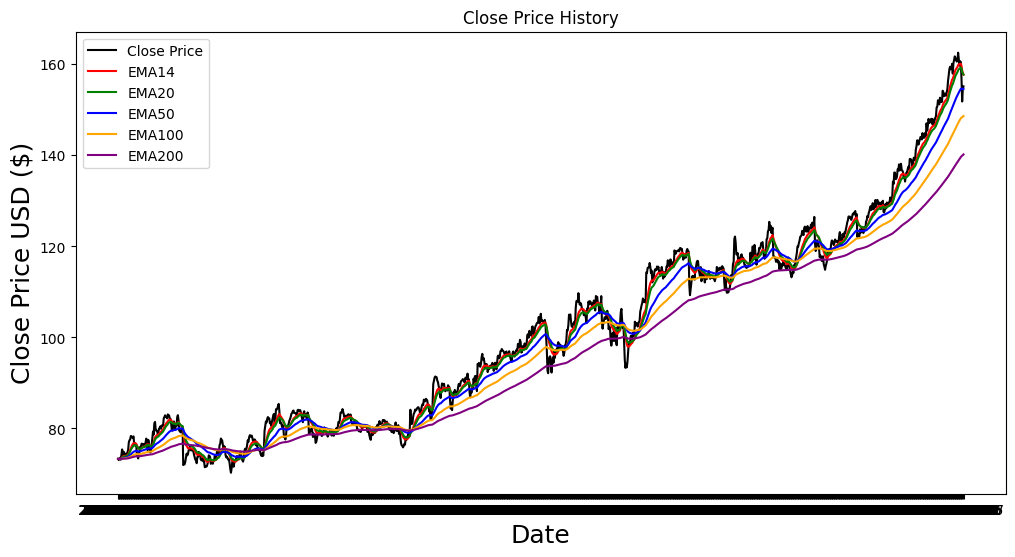

In [6]:
# plot the graph with the new feature
# EMA fields should be in the line format
# price should be in the bar format

def plot_graph(df):
    df.set_index('date', inplace=True)  # Set 'Date' as the index
    plt.figure(figsize=(12,6))
    plt.plot(df['close'], label='Close Price', color='black')
    plt.plot(df['EMA14'], label='EMA14', color='red')
    plt.plot(df['EMA20'], label='EMA20', color='green')
    plt.plot(df['EMA50'], label='EMA50', color='blue')
    plt.plot(df['EMA100'], label='EMA100', color='orange')
    plt.plot(df['EMA200'], label='EMA200', color='purple')
    plt.title('Close Price History')
    plt.xlabel('Date', fontsize=18)
    plt.ylabel('Close Price USD ($)', fontsize=18)
    plt.legend(loc='upper left')
    plt.show()

# call the plot_graph function
plot_graph(df)